{{ badge }}

# Intro to engineering statistics

Most of the models you have covered in your chemical engineering classes are focused on deterministic models:
- Definition: Mathematical model in which outcomes are precisely determined through known relationships among states and events, without any room for random variation. In such models, a given input will always produce the same output, such as in a known chemical reaction. 

However real life is often not deterministic, due to factors outside of our control:
- We have a deterministic model, but we aren't sure about the values of our parameters
- The model itself might be stochastic (random), such as chemical kinetics at very small concentrations
- We may be modeling a process with an assumed model, but that model may be wrong or one of a variety of possible models

Some of the most common questions we face as chemical engineers:
- Given a model with parameters, and some uncertainty in those values, what is the likelihood of various outcomes (getting conversion about 90%, making X dollars in profit, etc)
- Given a model and experimental data, does the model explain the data?
- Given a model with unknown parameters and experimental data, what are the likely values of those parameters?


**Goals for last three classes:**
- Make sure we all understand common distributions and how to plot/sample from them in python
- Translate an engineering problem into a statistics one through assumptions about underlying distributions
- Use analytical estimates or numerical sampling to solve a statistics problem
- Apply statistics tools to common engineering questions (like propagation of uncertainty and curve fitting)

[Seaborn](https://seaborn.pydata.org/index.html) is a prettier data visualization and statistics plotter that we'll use here

In [0]:
# make our plot look a little prettier, seaborn is also helpful for some plots
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Simple distributions

## Discrete distributions

Discrete distributions describe the probability of one of a number of discrete events happening. 



###  Example 1: flipping a coin
- P(heads) = 1/2
- P(tails) = 1/2

There are only two possibilities - heads or tails. We call P(x) 'the probability of x' for a single event. In this case, we have assumed that we know the probabilty of those two events. 

We can generate number from a random distribution in python with [default_rng](https://numpy.org/doc/stable/reference/random/generator.html?highlight=default_rng#numpy.random.default_rng)

In [0]:
import numpy as np 

#get a random number generator
rng = np.random.default_rng()

# Simple coin flip analysis
def coin_flip():
  flip = rng.binomial(1, 0.5)
  return flip

print(coin_flip())
print(coin_flip())
print(coin_flip())
print(coin_flip())
print(coin_flip())
print(coin_flip())
print(coin_flip())

1
0
1
1
0
0
1


Now, let's generate a lot of random coin flips. 

In [0]:
# This is probably not the most efficient way to do this, but it works
results = [coin_flip() for i in range(20)]

#We could also do this directly
results = rng.binomial(1,0.5,20)
print(results)

[1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0]


Being able to sample from a distribution is not very satisfying. We often want to plot these. I'm sure you've all seen histograms before. 

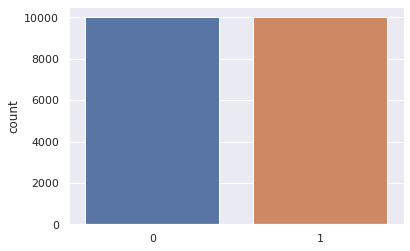

In [0]:
import matplotlib.pyplot as plt

#Generate 20,000 coin flips
results = rng.binomial(1,0.5,20000)

sns.countplot(results)
plt.show()

Notice that this histogram is stochastic - every time you run it you get a different result. We'll come back to this.

### Example 2: Weighted dice (multinomial)

A multinomial distribution is similar to a binomial distribution, but we have more than two choices, each with a specific probability. 

A classic example is a six sided die, where that are 6 possibilities, each with a probability 1/6. 

In [0]:
dice_probabilities = [1/6,1/6,1/6,1/6,1/6,1/6]

# perfect dice roll sample
def dice_roll():
  roll, = np.where(rng.multinomial(1, dice_probabilities))
  return roll[0]

#roll the dice
print(dice_roll())

5


Let's repeat this for 10,000 rolls

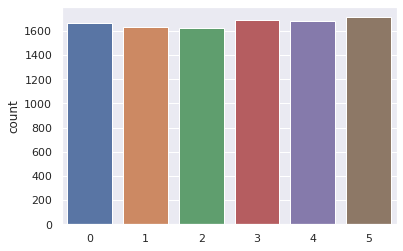

In [0]:
#Generate 10,000 dice roll samples
results = [dice_roll() for i in range(10000)]

#Plot the results
sns.countplot(results)
plt.show()

This histogram is also stochastic but has more discrete possibilities.

### In-class assignment

Modify the code to calculate a histogram for a loaded dice, where the probability of a 6 is 20%, and the probability of the other are 80/5=16%. 

After about how many rolls are you confident the dice is loaded?


6


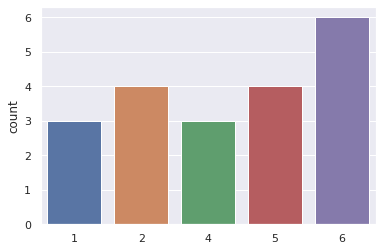

In [0]:
dice_probabilities = [.16,.16,.16,.16,.16,.2]

# perfect dice roll sample
def weighted_dice_roll():
  roll, = np.where(rng.multinomial(1, dice_probabilities))
  return roll[0]+1

#roll the dice
print(weighted_dice_roll())

#Generate 10,000 dice roll samples
results = [weighted_dice_roll() for i in range(20)]

#Plot the results
sns.countplot(results)
plt.show()

In [0]:
def roll_dice_20_record_6():
  samples_6 = np.array([weighted_dice_roll() for i in range(10)])==6
  fraction_6 = np.sum(samples_6) / len(samples_6)
  return fraction_6

results = [roll_dice_20_record_6() for i in range(100)]

np.sum(np.array(results)>1/6)/len(results)

0.5

## Continuous Distributions

Many of the variables we are interested in can take on any value in a continuous range. For example temperature can be 273.15 or 278.0 or 273.16, or 273.1666. We can't say the probability that the temperature will be exactly 273.000000000000000(infinite zeros) K. Instead, what we can say is the probability that it will be in a range. We define the probability distribution function (PDF) $f(x)$
$$P[a\leq X\leq b] = \int_a^b f(x) dx$$
We can also define the cumulative distribution function:
$$ F_X(x) = P(X<x)=\int_{-\infty}^xf_X(t)dt$$

### Gaussian distribution

The most common continuous distribution is the Gaussian distribution function, where $f(x)$ is 

$$f(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$$

Text(0, 0.5, 'Probability Density (units of 1/x)')

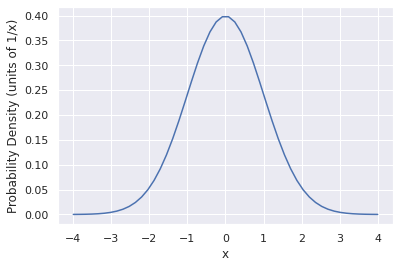

In [0]:
#Analytical gaussian probability distribution function
x = np.linspace(-4,4)
f = 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

#Plot the distribution
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('Probability Density (units of 1/x)')

This is the probability density function. It represents the distribution of possibilities that you could get if you randomly sampled from this distribution many times. We can do that with numpy too.

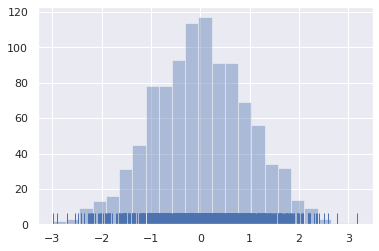

In [0]:
#Generate 100 samples from a normal distribution and plot it
x = rng.normal(0, 1, 1000)
ax = sns.distplot(x, rug=True, kde=False)

Note that this doesn't say anything about the mean (0) and standard deviation (1). We can get that by modifying this with an offset and standard deviation:
$$ f(x|\mu, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x-\mu)^2/2\sigma^2}$$
where $\mu$ is the mean and $\sigma$ is the standard deviation.

Let's say we measure the temperature outdoors several times and report 10 C +/- 2C. We can plot the implied distribution for that too.

Text(0, 0.5, 'Probability Density [1/C]')

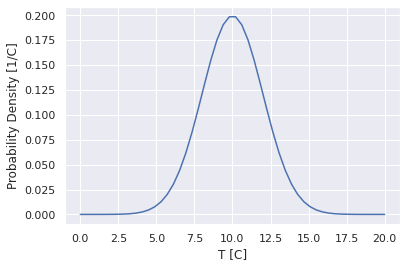

In [0]:
#Plot the gaussian distribution function

mu = 10
sigma = 2

x = np.linspace(0,20)
f = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/2/sigma**2);
plt.plot(x,f)
plt.xlabel('T [C]')
plt.ylabel('Probability Density [1/C]')

This implies that if we were to go out and measure the temperature more times, then plot a histogram, we would get something that look this. This also says that the probability of the temperature being in between 10 and 11 C is:
$$P[10<T<11]=\int_{10}^{11}\frac{1}{\sqrt{2\pi2^2}}e^{-(x-10)^2/2\cdot2^2}dx$$. 

In [0]:
from scipy.integrate import quad

def temperature_pdf(T):
  mu=10
  sigma=2
  f = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(T-mu)**2/2/sigma**2)
  return f

quad(temperature_pdf,10,11)

(0.19146246127401312, 2.1256603285781175e-15)

This says that the probability of the temperature actually being between 10 and 11 K is 19.1%

**Cumulative Distribution Functions**

This question is so common that we can use the cumulative distribution function, which is known for a gaussian:
$$P[10<T<11]=\int_{10}^{11}\frac{1}{\sqrt{2\pi2^2}}e^{-(x-10)^2/2\cdot2^2}dx=\int_{-\infty}^{11}\frac{1}{\sqrt{2\pi2^2}}e^{-(x-10)^2/2\cdot2^2}dx\\
-\int_{-\infty}^{10}\frac{1}{\sqrt{2\pi2^2}}e^{-(x-10)^2/2\cdot2^2}dx$$ This results in a special function (the error function):
$$F(x)=\frac{1}{2}\left[1+\text{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)\right]$$


In [0]:
import scipy

def temperatureCDF(T):
    mu=10
    sigma=2
    cdf = 1/2*(1+scipy.special.erf((T-mu)/sigma/np.sqrt(2)))
    return cdf

print(temperatureCDF(11))
print(temperatureCDF(10))

print(temperatureCDF(11)-temperatureCDF(10))

print('The probability that T is between 10 and 11 is %1.1f percent'%((temperatureCDF(11)-temperatureCDF(10))*100))

0.691462461274013
0.5
0.191462461274013
The probability that T is between 10 and 11 is 19.1 percent


This result is basically identical to the direct integration

# Sampling from a distribution

Say we know exactly what the probability density function of a process is. Drawing samples from that distribution (the continuous equivalent of rolling the dice multiple times) can be very difficult. There are several likely scenarios:
- You might know how to sample from the distribution if it is very simple
- You can see if methods already exist in python or other packages to sample from the distribution 
- (harder) you can use methods such as Monte Carlo methods to numerically generate samples from an arbitrary PDF. 

We will assume that you can sample from a distribution in python for this week. 

# Plotting distributions

I am sure you all are aware of how to make histograms. In matplotlib it is quite easy with the `hist` function. This is very straightforward. 

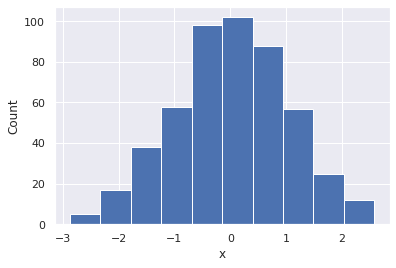

Text(0, 0.5, 'Count')

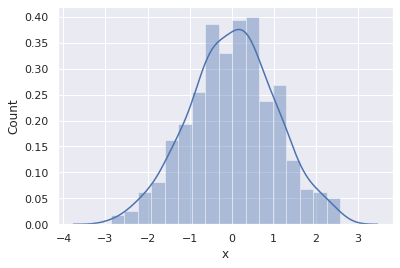

In [0]:
#Generate 500 samples
x = rng.normal(0, 1, 500)

# Plot distribution with matplotlib
ax = plt.hist(x)
plt.xlabel('x')
plt.ylabel('Count')
plt.show()

# Plot distribution with seaborn
ax = sns.distplot(x)
plt.xlabel('x')
plt.ylabel('Count')

This count is not very helpful, as we can't really compare it to the probability distribution function from before. Most importantly, it's not normalized, but it also depends on the bin size. For example:

Text(0, 0.5, 'Count')

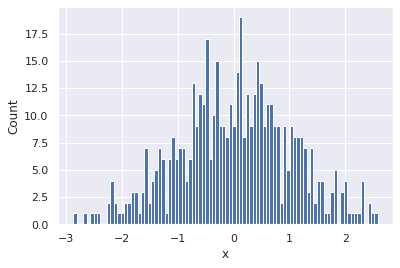

In [0]:
#Histogram with 90 bins
plt.hist(x,90)
plt.xlabel('x')
plt.ylabel('Count')

What we are often more interested in is an estimate of the probability distribution function with some assumption on how smooth the curve is. For example, there is a gaussian_kde function to do this for you. 

Text(0, 0.5, 'Probability Density Function')

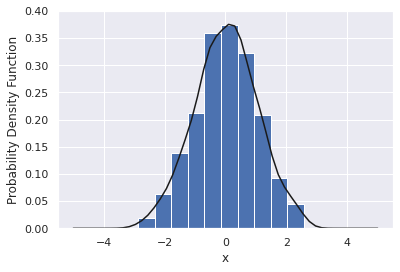

In [0]:
import scipy

#Calculate the KDE estimate
eval_range = np.linspace(-5,5)
kde_estimate = scipy.stats.gaussian_kde(x)

# Plot the histogram (binned)
plt.hist(x,10, density=True)

#Plot the KDE
plt.plot(eval_range,kde_estimate(eval_range),'k')
plt.ylim([0,0.4])
plt.xlabel('x')
plt.ylabel('Probability Density Function')

The seaborn package (similar to matplotlib), can do this for you

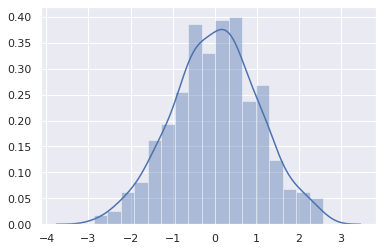

In [0]:
sns.distplot(x)

# Central limit theorem

We tend to focus on Gaussian distributions because of a phenomenon known as the central limit theorem. Essentially, if you have a large number of independent, identically distributed values (imagine the coin toss or dice roll), the sum of those numbers or the expectation of the samples will converge to a Gaussian distribution. Remarkably, this is true regardless of the distribution they are pulled from!

For example, let's consider a number of coin tosses and we're interested in the average number of heads that we will get out of X tosses (X could be 1, 10, 100, etc). 

In [0]:
# Simple coin flip analysis
def coin_flip():
  flip = rng.binomial(1, 0.5)
  return flip

def fraction_heads(num_flips):
  flips = [coin_flip() for i in range(num_flips)]
  total = sum(flips)/num_flips
  return total

fraction_heads(100)

0.49

I can repeat this process over and over and see how this total number varies.

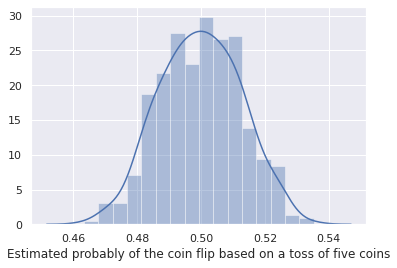

In [0]:
flip_results = [fraction_heads(1500) for i in range(500)]

sns.distplot(flip_results)
plt.xlabel('Estimated probably of the coin flip based on a toss of five coins')
plt.show()

This is for 5 independent variables (5 independent coin tosses). The central limit theorem only holds for an infinite number of coin tosses, so it's accuracy will improve with number of independent coin tosses. 

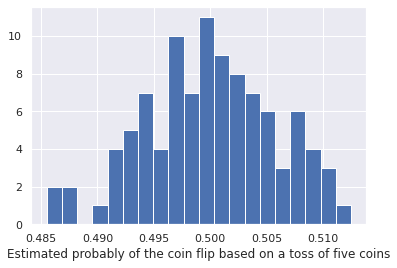

In [0]:
flip_results = [fraction_heads(10000) for i in range(100)]

plt.hist(flip_results,20)
plt.xlabel('Estimated probably of the coin flip based on a toss of five coins')
plt.show()

Many chemical engineering examples are the results of a huge number of independent random interactions (atoms bouncing off of each other or reacting) so we often get Gaussian distributions in parameter values. Thus, assuming parameters or quantities are gaussian distributed is often a reasonable approximation, but should be checked.

# Estimates on properties of a distribution

One of the most common questions in science/engineering is
- given a number of samples and,
- assuming the samples are gaussian distributed,

what is the mean and standard deviation of the underlying distribution, and what are the errors in estimating these properties? 

Remember that for the Gaussian distribution we have two parameters $\mu$ and $\sigma$
$$ f(x|\mu, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x-\mu)^2/2\sigma^2}$$

We have two options:
- We could vary the parameters in the gaussian distribution and see what values best fit the data. This is the most general idea, but can be very non-linear or time intensive. 
- For a specific PDF and set of properties, we can find the Maximum Likelihood Estimator (MLE) which is the best function to estimate the quantity. 

### Curve fitting approach

We have already covered how to do non-linear optimization. As an example, let's consider a set of random data

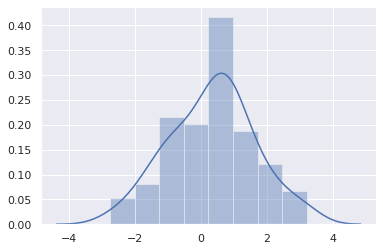

In [0]:
samples = rng.normal(0.2, 1.2, 100)

sns.distplot(samples)
plt.show()

Instead of fitting a probability distribution to data, we instead fit the cumulative distribution function. First, let's plot the CDF of this data. 

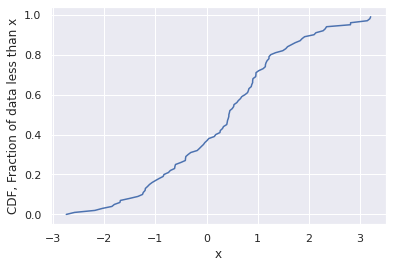

In [0]:
CDF = np.array(list(range(len(samples))))/len(samples)
plt.plot(sorted(samples),CDF)
plt.xlabel('x')
plt.ylabel('CDF, Fraction of data less than x')
plt.show()

Notice that there is no binning error here - much better than trying to fit a histogram! Now, let's use the CDF function that we know has to hold true for a Gaussian.

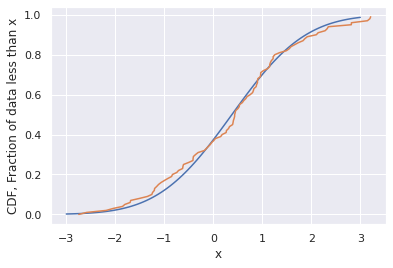

In [0]:
def GaussianCDF(x):
  mu=0.38
  sigma=1.18
  cdf = 1/2*(1+scipy.special.erf((x-mu)/sigma/np.sqrt(2)))
  return cdf


x_range = np.linspace(-3,3,100)
cdf_range = GaussianCDF(x_range)
plt.plot(x_range,cdf_range)


CDF = np.array(list(range(len(samples))))/len(samples)
plt.plot(sorted(samples),CDF)
plt.xlabel('x')
plt.ylabel('CDF, Fraction of data less than x')
plt.show()



We can play with the fixed values of mu and sigma here to see how well we get the two to fit.

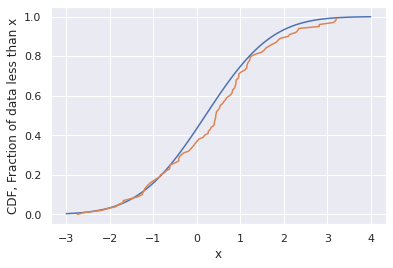

In [0]:
def GaussianCDF(x):
  mu=0.2
  sigma=1.2
  cdf = 1/2*(1+scipy.special.erf((x-mu)/sigma/np.sqrt(2)))
  return cdf


x_range = np.linspace(-3,4,100)
cdf_range = GaussianCDF(x_range)
plt.plot(x_range,cdf_range)


CDF = np.array(list(range(len(samples))))/len(samples)
plt.plot(sorted(samples),CDF)
plt.xlabel('x')
plt.ylabel('CDF, Fraction of data less than x')
plt.show()



Note that the best fitted values of the parameters aren't accurate! We don't have a way to quantify this uncertainty, but we could do it with likelihood estimation or known estimators. 

### Analytical estimators

If you make assumptions about the probability distribution and the function you are interested in, you can derive a function that will directly estimate the parameter you are interested in. 

For a gaussian probability distribution function:
- The best estimator of the parameter $\mu$ is the average: $(\sum x_i)/N$, with variance $\sigma^2/N$
- The best estimator of the parameter $\sigma$ is
$$ s^2=\frac{n}{n+1}\sigma^2$$
where $\sigma$ is the standard deviation of the samples. The uncertainty on this estimate is 
the standard deviation, with variance given by $\sigma^4/(n-1)$

Let's try this for our gaussian distributed data

In [0]:
samples = rng.normal(0.2, 1.2, 100)

# Actual mean: 0.2
estimated_mean = np.mean(samples)
estimated_mean_std = np.sqrt(np.std(samples)**2/len(samples))
print('Our estimate on the mean is %1.2f +/- %1.2f'%(estimated_mean, estimated_mean_std))

# Actual std: 1.2
estimated_std = np.std(samples)*len(samples)/(len(samples)+1)
estimated_std_std = np.sqrt(np.std(samples)**4/(len(samples)-1))
print('Our estimate on the standard deviation is %1.2f +/- %1.2f'%(estimated_std, estimated_std_std))



Our estimate on the mean is 0.09 +/- 0.13
Our estimate on the standard deviation is 1.24 +/- 0.16


Notice that every time we sample this we get a different result, and it varies quite a bit! Let's see how this estimate varies.

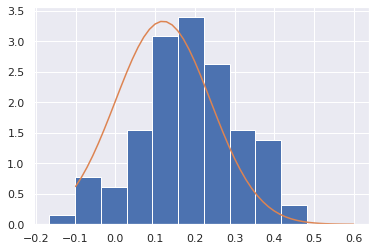

In [0]:
mean_estimates = [np.mean(rng.normal(0.2, 1.2, 100))
                  for i in range(100)]

#Draw the distribution of means from 200 random trials, each with 100 random trials
plt.hist(mean_estimates,density=True)

xrange = np.linspace(-0.1,0.6)
plt.plot(xrange,scipy.stats.norm.pdf(xrange, 0.12, 0.12))

plt.show()


This idea is very powerful - based on a single set of data, we estimated properties of the distribution, and got an idea of how much our estimate might be off simply because another set of results would give us a different result.

# Testing that two distributions are different

We often want to know if a distribution is substatially different from another distribution. For example:
- The average and the standard deviation of the first exam was 86% and 11.7% respectively.
- The average and the standard deviation of the second exam was 83% and 21% respectively.

We want to know, assuming these exams were both drawn from normal distributions, if the distribution for the second exam was substantially different from the first or just another realization of the same statistic.

Or to put it another way, was the second test harder than the first?

First, let's generate some synthetic data from these distributions: 

In [0]:
exam1_scores = rng.normal(86,11.72, 45)
exam2_scores = rng.normal(83,21, 45)


It always helps to plot the data

(array([1., 0., 0., 7., 1., 7., 9., 9., 7., 4.]),
 array([ 12.72736926,  23.75282098,  34.77827269,  45.8037244 ,
         56.82917612,  67.85462783,  78.88007955,  89.90553126,
        100.93098297, 111.95643469, 122.9818864 ]),
 <a list of 10 Patch objects>)

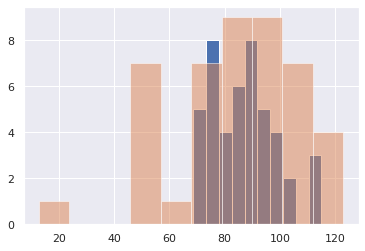

In [0]:
plt.hist(exam1_scores, 10)
plt.hist(exam2_scores, 10, alpha=0.5)

We want to know if the average or standard deviation of those two tests is substantially different, or if we gave a different class of similar students the same two exams, the results would have come out different. 

Another way of saying it is - if we assume the distribution is Gaussian with observed mean and standard deviation, what would the distribution of observed means or standard deviations have looked like? 

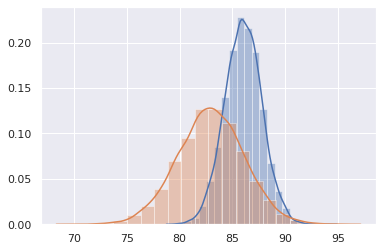

In [0]:
xrange = np.linspace(0,100,400)

exam1_scores_mean_sample = [np.mean(rng.normal(86,11.72, 45)) for i in range(10000)]
exam2_scores_mean_sample = [np.mean(rng.normal(83,21, 45)) for i in range(10000)]

sns.distplot(exam1_scores_mean_sample,20)
sns.distplot(exam2_scores_mean_sample,20)

Now, let's find properties of this new distribution

In [0]:
print('Our observed distribution of means for exam 1 (multiple exams given) is %1.2f +/- %1.2f'%(np.mean(exam1_scores_mean_sample),
                                                                                                np.std(exam1_scores_mean_sample)))

print('Our observed distribution of means for exam 2 (multiple exams given) is %1.2f +/- %1.2f'%(np.mean(exam2_scores_mean_sample),
                                                                                                np.std(exam2_scores_mean_sample)))

Our observed distribution of means for exam 1 (multiple exams given) is 86.01 +/- 1.75
Our observed distribution of means for exam 2 (multiple exams given) is 82.95 +/- 3.14


Let's compare the mean and standard deviation of these estimates with the ones we get from the analytical estimates from a single trial.

In [0]:
# Exam 1 mean
estimated_mean = np.mean(exam1_scores)
estimated_mean_std = np.sqrt(np.std(exam1_scores)**2/len(exam1_scores))
print('Our estimate on the mean for exam 1 is %1.2f +/- %1.2f'%(estimated_mean, estimated_mean_std))

# Exam 2 mean
estimated_mean = np.mean(exam2_scores)
estimated_mean_std = np.sqrt(np.std(exam2_scores)**2/len(exam2_scores))
print('Our estimate on the mean for exam 2 is %1.2f +/- %1.2f'%(estimated_mean, estimated_mean_std))


Our estimate on the mean for exam 1 is 86.99 +/- 1.71
Our estimate on the mean for exam 2 is 84.02 +/- 3.25


Finally, assuming that the distributions are Gaussian, how often does exam2 come out with a lower mean than exam 1?


In [0]:
np.sum(np.array(exam2_scores_mean_sample)<np.array(exam1_scores_mean_sample))/len(exam1_scores_mean_sample)

0.806

## In-class assignment 

Assuming the distributions are gaussian, what is the likelihood that we would have found a larger standard deviation on the second exam than the first?